# Beta Bank

## Predicciones frente al comportamiento de los clientes

Con este trabajo se pretende entrenar un modelo para predecir qué clientes están por irse del banco, buscando evitarlo, ya que resulta más rentable salvar a los clientes existentes que atraer nuevos.

### Objetivo: 

Crear un modelo con el máximo valor F1 posible (mínimo 0.59).

In [1]:
#Librerías utilizadas.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Uso en el ordenador.
#data = pd.read_csv('./Churn.csv')

#Revisión externa. 
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
#Revisión de qué tan extensa es la lista de países. 

data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
print(data.shape)

(10000, 14)


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#Revisión de duplicados.

print(data.duplicated().sum())

0


In [9]:
#Revisión de datos ausentes.

print(data.isna().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


## Observaciones a partir del Data Frame

- Los nombres de las columnas son una mezcla de minúsculas y mayúsculas, se cambiarán estos para unificar los estilos de escritura a una mejor práctica.
- Los tipos de datos son correctos en cada columna.
- No todos los datos aportan al objetivo, podemos descartar: 'RowNumber', 'CustomerId', 'Surname'. Se transformarán  'Geography y 'Gender' con el método 'One Hot' para tenerlos en cuenta en el modelo, mientras el resto de datos se dejarán tal cual están.
- Hay 909 datos ausentes de la columna 'Tenure', al ser poco menos del 10 % de los datos no se eliminarán, pero sí se sustiturá por la media.
- No hay datos duplicados. 

## Preprocesamiento de datos

In [10]:
#Cambio de minúsculas a mayúsculas en las columnas.

col_names_lower = []

for old_name in data.columns:
    name_lowered = old_name.lower()
    col_names_lower.append(name_lowered)
    
data.columns = col_names_lower

print(data.columns)


Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


In [11]:
#Renombre de las columnas para que cada palabra esté dividida por un guión bajo. 

column_new ={
    'rownumber': 'row_number', 
    'customerid': 'customer_id', 
    'creditscore': 'credit_score', 
    'numofproducts': 'num_of_products', 
    'hascrcard': 'has_cr_card', 
    'isactivemember': 'is_active_member',
    'estimatedsalary': 'estimated_salary'
    }

data.rename(columns = column_new, inplace = True)

print(data.columns) 

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


In [12]:
#Eliminación de las columnas que no aportan al modelo de machine learning.

data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [13]:
# Tratamiento de datos ausentes. 

tenure_mean = data['tenure'].mean().round()

print(tenure_mean)

5.0


In [14]:
data['tenure'] = data['tenure'].fillna(tenure_mean)

In [15]:
print(data.isna().sum())

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


## Evidencia del desequilibrio de clases

In [16]:
still_customers = data[data['exited'] == 0]

non_customers = data[data['exited'] == 1]


print('Users that still have an account at Beta Bank:', still_customers['exited'].count())
print("Users that doesn't have an account at Beta Bank anymore:", non_customers['exited'].count())

Users that still hava an account at Beta Bank: 7963
Users that doesn't have an account at Beta Bank anymore: 2037


<Axes: title={'center': 'Users that have an account at Beta Bank'}, xlabel='Exited'>

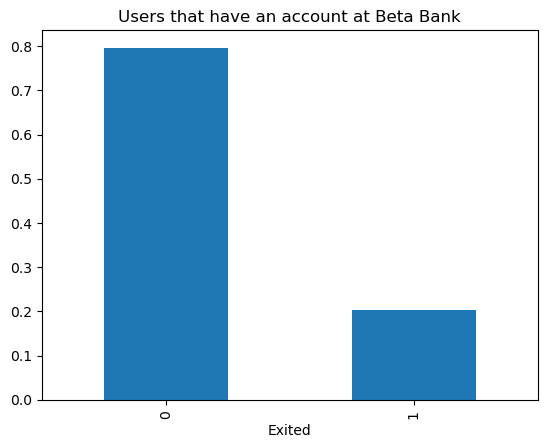

In [17]:
class_frequency = data['exited'].value_counts(normalize=True)

class_frequency.plot(kind = 'bar', title = 'Users that have an account at Beta Bank', xlabel = 'Exited')

Tanto la gráfica como las cantidades extraídas demuestran el gran desequilibrio en la clase 'exited'. Podemos observar que es mucho más común en nuestros datos que los usuarios del banco permanezcan en el banco en lugar de que lo abandonen. 

## Prepraración de los datos para la elaboración de modelos

In [18]:
# Aplicación del método One Hot para aprovechar las columnas no numéricas restantes (geography y gender).

data_ohe = pd.get_dummies(data, dtype = int, drop_first=True)

data_ohe.head(3)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


### División de los datos en conjuntas para entrenar los modelos

In [19]:
data_train, data_test = train_test_split(data_ohe, test_size = 0.4, train_size = 0.6, random_state = 888)

In [20]:
data_test, data_valid = train_test_split(data_test, test_size = 0.5, train_size = 0.5, random_state = 888)

In [21]:
#Datos para el entrenamiento.
train_features = data_train.drop(['exited'], axis=1)
train_target = data_train['exited']

#Datos para el test.
test_features = data_test.drop(['exited'], axis=1)
test_target = data_test['exited']

#Datos para la validación.
valid_features = data_valid.drop(['exited'], axis=1)
valid_target = data_valid['exited']

In [22]:
print(train_features.shape)
print(train_target.shape)
print()
print(test_features.shape)
print(test_target.shape)
print()
print(valid_features.shape)
print(valid_target.shape)

(6000, 11)
(6000,)

(2000, 11)
(2000,)

(2000, 11)
(2000,)


## Entrenamiento de modelos ignorando el desequilibrio de clases

## Modelo 1: 
### Árbol de dicisión

In [23]:
best_acc_dt = 0

best_depth_dt = 0

for depth in range(1, 11):
    model_dt = DecisionTreeClassifier(random_state = 888, max_depth = depth)
    model_dt.fit(train_features, train_target)
    valid_predictions = model_dt.predict(valid_features)
    acc = accuracy_score(valid_target, valid_predictions)
    if acc > best_acc_dt:
        best_acc_dt = acc
        best_depth_dt = depth

print()
print(f'The best model found has a depth of {best_depth_dt} with an accuracy of {best_acc_dt}')


The best model found has a depth of 6 with an accuracy of 0.8545


In [24]:
#Prueba de exactitud con el modelo elegido en su versión test y entrenamiento:

model_dt = DecisionTreeClassifier(random_state = 888, max_depth = 6)

model_dt.fit(train_features, train_target)

train_predictions = model_dt.predict(train_features)

test_predictions = model_dt.predict(test_features)

print('Accuracy comparison: Decision Tree')
print()
print('Training set:', accuracy_score(train_target, train_predictions))
print('Test set:', accuracy_score(test_target, test_predictions))

Accuracy comparison: Decision Tree

Training set: 0.8701666666666666
Test set: 0.858


In [25]:
#Pruebas en el modelo Árbol de decisión.

valid_predictions = model_dt.predict(valid_features)

acc_valid_dt = accuracy_score(valid_target, valid_predictions)

precision_dt = precision_score(valid_target, valid_predictions)

recall_dt = recall_score(valid_target, valid_predictions)

f1_dt = f1_score(valid_target, valid_predictions)

print('Decision Tree')
print()
print('Accuracy:', acc_valid_dt)
print('Recall:', recall_dt)
print('Precision:', precision_dt)
print('F1:', f1_dt)

Decision Tree

Accuracy: 0.8545
Recall: 0.42997542997543
Precision: 0.7478632478632479
F1: 0.5460218408736349


Las métricas del modelo de Árbol de decisión evidencian que: 

- El desequilibrio de clases no permite que confiemos en la métrica de exactitud. 
- Al tener una precisión más alta que el recall se evidencia que el modelo encontró más respuesta negativas que positivas. 
- La métrica de F1 no está tan mal, pero no cumple los estándares de la prueba (F1 de al menos .59).

## Modelo 2: 
### Bosque aleatorio

In [26]:
#Prueba para elegir el mejor hiperparámetro para el modelo de Random Forest.

best_score = 0

best_est = 0

for est in range(1, 60): 
    model_rf = RandomForestClassifier(random_state = 888, n_estimators = est) 
    model_rf.fit(train_features, train_target) 
    score = model_rf.score(valid_features, valid_target)
    if score > best_score:
        best_score = score
        best_est = est

print("The accuracy of the best model in the validation set(n_estimators = {}): {}".format(best_est, best_score))

The accuracy of the best model in the validation set(n_estimators = 59): 0.8625


In [27]:
#Modelo con los hiperparámetros seleccionados.

model_rf = RandomForestClassifier(random_state = 888, n_estimators = 59) 

model_rf.fit(train_features, train_target) 

acc_train_rf = model_rf.score(train_features, train_target)

acc_test_rf = model_rf.score(test_features, test_target)

print('Accuracy comparison: Random Forest')
print()
print('Training set:', acc_train_rf)
print('Test set:', acc_test_rf)

Accuracy comparison: Random Forest

Training set: 0.9998333333333334
Test set: 0.8655


In [28]:
#Pruebas en el modelo Bosque aleatorio.

acc_valid_rf = model_rf.score(valid_features, valid_target)

valid_predictions = model_rf.predict(valid_features)

precision_rf = precision_score(valid_target, valid_predictions)

recall_rf = recall_score(valid_target, valid_predictions)

f1_rf = f1_score(valid_target, valid_predictions)

print('Random Forest')
print()
print('Accuracy:', acc_valid_rf)
print('Recall:', recall_rf)
print('Precision:', precision_rf)
print('F1:', f1_rf)


Random Forest

Accuracy: 0.8625
Recall: 0.45454545454545453
Precision: 0.7773109243697479
F1: 0.5736434108527132


Las métricas del modelo de Bosque aleatorio evidencian que: 

- El desequilibrio de clases no permite que confiemos en la métrica de exactitud. 
- La diferencia entre precision y recall son similares con el anterior modelo, mostrando la abundancia de respuestas negativas
- La métrica de F1 no está tan mal, es la más alta hasta el momento, pero aún no cumple los estándares de la prueba (F1 de al menos .59).

## Modelo 3: 
### Regresión logística


In [29]:
#Implementación del modelo de Regresión logística.

model_lr = LogisticRegression(random_state = 888, solver = 'liblinear')

model_lr.fit(train_features, train_target)

score_train = model_lr.score(train_features, train_target) 

score_test = model_lr.score(test_features, test_target) 

print('Accuracy comparison: Logistic Regression')
print()
print('Training set:', score_train)
print('Test set:', score_test)

Accuracy comparison: Logistic Regression

Training set: 0.7925
Test set: 0.785


In [30]:
#Exactitud del modelo Regresión logística.

acc_valid_lr = model_lr.score(valid_features, valid_target)

valid_predictions = model_lr.predict(valid_features)

precision_lr = precision_score(valid_target, valid_predictions)

recall_lr = recall_score(valid_target, valid_predictions)

f1_lr = f1_score(valid_target, valid_predictions)

print('Logistic Regression')
print()
print('Accuracy:', acc_valid_lr)
print('Recall:', recall_lr)
print('Precision:', precision_lr)
print('F1:', f1_lr)

Logistic Regression

Accuracy: 0.794
Recall: 0.044226044226044224
Precision: 0.43902439024390244
F1: 0.08035714285714286


Según las métricas del modelo de regresión logística, este es el modelo más inexacto de todos, con un F1 que se acerca más al 0 que al 1. 

## Comparación de F1 de los tres modelos ignorando el desequilibrio


In [31]:
print('Decision tree model F1:', f1_dt.round(3))
print('Random forest model F1:', f1_rf.round(3))
print('Logistic regression F1:', f1_lr.round(3))

Decision tree model F1: 0.546
Random forest model F1: 0.574
Logistic regression F1: 0.08


El modelo con mejores números es el de Bosque aleatorio. 

## Tratando el desequilibrio de clases en el modelo Random Forest

### Método class_weight

In [32]:
model_rf = RandomForestClassifier(random_state = 888, n_estimators = 59, class_weight = 'balanced_subsample') 

model_rf.fit(train_features, train_target) 

valid_predictions = model_rf.predict(valid_features)

f1_rf_2 = f1_score(valid_target, valid_predictions)

print('F1:', f1_rf_2)


F1: 0.5466237942122186


En el caso del de Bosque aleatorio, el aplicar un método para balancear la desigualdad de las clases terminó empeorando su métrica de F1. 

### Método de sobremuestreo

In [33]:
def upsample(train_features, train_target, repeat):
    features_zeros = train_features[train_target == 0]
    features_ones = train_features[train_target == 1]
    target_zeros = train_target[train_target == 0]
    target_ones = train_target[train_target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 888)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(train_features, train_target, 10)

model_rf = RandomForestClassifier(random_state = 888, n_estimators = 59)

model_rf.fit(features_upsampled, target_upsampled)

valid_predictions = model_rf.predict(valid_features)

f1_rf_3 = f1_score(valid_target, valid_predictions)

print('F1:', f1_rf_3)

F1: 0.6105834464043419


En este caso, el método de sobremuestreo ayudó a nuestro modelo de Bosque aleatorio a superar el umbral de F1 mínimo para la prueba, siendo hasta ahora el mejor modelo donde se remedia el problema de desequilibrio de clases. 

## Tratando el desequilibrio de clases en el modelo Árbol de decisión

### Método class_weight

In [34]:
model_dt = DecisionTreeClassifier(random_state = 888, max_depth = 6, class_weight = 'balanced') 

model_dt.fit(train_features, train_target) 

valid_predictions = model_dt.predict(valid_features)

f1_dt_2 = f1_score(valid_target, valid_predictions)

print('F1:', f1_dt_2)

F1: 0.5736137667304015


En el caso del Árbol de decisión, ajustar el balance de las clases sí favoreció la métrica de F1, sin embargo, el nuevo número no supera el umbral ni las métricas del anterior modelo. 

### Método de sobremuestreo

In [35]:
def upsample(train_features, train_target, repeat):
    features_zeros = train_features[train_target == 0]
    features_ones = train_features[train_target == 1]
    target_zeros = train_target[train_target == 0]
    target_ones = train_target[train_target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 888)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(train_features, train_target, 10)

model_dt = DecisionTreeClassifier(random_state = 888, max_depth = 6)

model_dt.fit(features_upsampled, target_upsampled)

valid_predictions = model_dt.predict(valid_features)

f1_dt_3 = f1_score(valid_target, valid_predictions)

print('F1:', f1_dt_3)

F1: 0.47227658186562294


Al contrario del modelo anterior, en el modelo de Árbol de decisión el implementar el método de sobremuestreo no ayudó a las métricas del modelo, de hecho, empeoró su F1. 

## Tratando el desequilibrio de clases en el modelo Regresión logística

### Método class_weight

In [36]:
model_lr = LogisticRegression(random_state = 888, solver = 'liblinear', class_weight = 'balanced') 

model_lr.fit(train_features, train_target) 

valid_predictions = model_lr.predict(valid_features)

f1_lr_2 = f1_score(valid_target, valid_predictions)

print('F1:', f1_lr_2)

F1: 0.4697872340425531


### Método de sobremuestreo

In [37]:
def upsample(train_features, train_target, repeat):
    features_zeros = train_features[train_target == 0]
    features_ones = train_features[train_target == 1]
    target_zeros = train_target[train_target == 0]
    target_ones = train_target[train_target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 888)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(train_features, train_target, 10)

model_lr = LogisticRegression(random_state = 888, solver = 'liblinear')

model_lr.fit(features_upsampled, target_upsampled)

valid_predictions = model_lr.predict(valid_features)

f1_lr_3 = f1_score(valid_target, valid_predictions)

print('F1:', f1_lr_3)

F1: 0.3461868037703513


En cuanto a la Regresión logística, el tratar el desequilibrio de clases, ya fuera ajustando el balance o implementando un sobremuestreo antes de entrenar al modelo ayudó en gran medida a mejorar sus métricas; sin embargo, sigue siendo el modelo menos preciso. 

## Comparación de F1 de los tres modelos y los métodos para tratar el desequilibrio

In [38]:
print('Random Forest model')
print('Original F1:', f1_rf.round(3))
print('Class weight method F1:', f1_rf_2.round(3))
print('Upsampling method F1:', f1_rf_3.round(3))
print()
print('Decision Tree model')
print('Original F1:', f1_dt.round(3))
print('Class weight method F1:', f1_dt_2.round(3))
print('Upsampling method F1:', f1_dt_3.round(3))
print()
print('Logistic Regression model')
print('Original F1:', f1_lr.round(3))
print('Class weight method F1:', f1_lr_2.round(3))
print('Upsampling method F1:', f1_lr_3.round(3))

Random Forest model
Original F1: 0.574
Class weight method F1: 0.547
Upsampling method F1: 0.611

Decision Tree model
Original F1: 0.546
Class weight method F1: 0.574
Upsampling method F1: 0.472

Logistic Regression model
Original F1: 0.08
Class weight method F1: 0.47
Upsampling method F1: 0.346


Las anteriores métricas nos permiten elegir sin duda alguna al modelo de Bosque aleatorio con el método de sobremuestreo como el mejor modelo, siendo el único que superó el umbral requerido de F1.

## Métrica AUC-ROC

### Comparando el modelo elegido con un modelo aleatorio

In [39]:
#Ejecución del Dummy Classifier para generar un modelo aleatorio. 

dummy_clf = DummyClassifier(random_state = 888, strategy = 'uniform')

dummy_clf.fit(train_features, train_target)

dummy_predictions = dummy_clf.predict(valid_features)

dummy_f1 = f1_score(valid_target, dummy_predictions)

print(dummy_f1)

0.2790035587188612


In [40]:
# Modelo elegido: 

model_rf = RandomForestClassifier(random_state = 888, n_estimators = 59)

model_rf.fit(features_upsampled, target_upsampled)

valid_predictions = model_rf.predict(valid_features)

chosen_model_f1 = f1_score(valid_target, valid_predictions)

print('F1:', chosen_model_f1)

F1: 0.6105834464043419


In [41]:
dummy_auc_roc = roc_auc_score(valid_target, dummy_predictions)

print(dummy_auc_roc)

0.48905993821248056


In [42]:
auc_roc = roc_auc_score(valid_target, valid_predictions)

print(auc_roc)

0.743456090913718


## Conclusiones

1. El mejor modelo para predecir si un cliente o usuario de Beta Bank permanecerá o no en el banco es el Bosque aleatorio con sobremuestreo, obteniendo una métrica F1 de 0.611, 0.021 sobre el umbral requerido. 
2. Ninguno de los otros modelos, aún variando los métodos para tratar el desequilibrio, lograron pasar el umbral requerido.
3. El modelo elegido logró superar las métricas del modelo aleatorio, siendo su valor AUC-ROC igual a 0.743, a diferencia del modelo aleatorio cuyo valor AUC-ROC fue de 0.489.
4. Los datos contaban con un gran desequilibrio de clases, siendo mucho más común los clientes que permanecían vinculados al banco que los que no. 
5. Se encontró un porcentaje de casi el 10 % de los datos de la columna 'tenure' ausentes, para no perder el resto de columnas de dichos datos se decidió rellenarlos con el promedio (5 años).